In [1]:
#Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings

warnings.filterwarnings("ignore")

In [2]:
#Load dataset and choose a sample of 2000 records

df = pd.read_csv("aprior.csv")
print(df.shape)
data = df.sample(2000)

(4000, 6)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2510 to 3554
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      2000 non-null   int64 
 1   product_id    2000 non-null   int64 
 2   product_name  2000 non-null   object
 3   status        2000 non-null   object
 4   order_date    2000 non-null   object
 5   state         2000 non-null   object
dtypes: int64(2), object(4)
memory usage: 109.4+ KB


In [4]:
#Remove cancelled orders

data = data[data['status']!="Cancelled"]
data.shape

(1739, 6)

In [5]:
# Check the number of unique products

print(f"There are {data['product_id'].nunique()} unique products")

There are 1241 unique products


In [6]:
basket = pd.crosstab(data['order_id'], data['product_name'])

basket.sample()

product_name,'Sexy Legs' Tattered Blue Jean Fashion Leggings,10-Pack Hanes Over-the-Calf Tube 180/10 White 6-12,100% Silk Woven Burgundy and Navy Nifty Striped Tie,100% Stretch Nylon Cheerleading Low-Rise Brief Trunks,2B Marina Strapless Hi Low Dress,2B Norah Sweetheart Peplum Dress,2B Solid Peplum Top,3 Piece Set: Polka Dot Push Up Bra Thong and Brief Underwear Set,50's Wiggle Pencil Pleat Dress Black,626 BLUE Big & Tall Cargo Shorts,...,ililily Varsity Jacket American Baseball Club College School Jacket Double-layer Cotton Snap-close Team Jacket with Stretchy two-tone ribbing trims (jackets-004),maxandcleo Women's Madilyn Dress,neff Men's Cookie Fashion Hoodie,neff Men's Corpo Cap,neff Men's Daily Shell Hood,neff Men's Gomez Fashion Hoodie,point6 1153 Active Light Cushion Mini Crew Socks,prAna Women's Kari Jacket,tokidoki Bejeweled Women's Hoodie,Â Â Exclusive Hawaiian Tropic Sunset In Paradise Aloha Shirt
order_id,,,,,,,,,,,,,,,,,,,,,
9814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
basket = basket.apply(pd.to_numeric, errors='coerce')
# Replace NaN values with 0 (if needed)
basket.fillna(0, inplace=True)

basket_sets = basket.applymap(lambda x: 1 if x > 1 else 0)
basket_sets.sample()

product_name,'Sexy Legs' Tattered Blue Jean Fashion Leggings,10-Pack Hanes Over-the-Calf Tube 180/10 White 6-12,100% Silk Woven Burgundy and Navy Nifty Striped Tie,100% Stretch Nylon Cheerleading Low-Rise Brief Trunks,2B Marina Strapless Hi Low Dress,2B Norah Sweetheart Peplum Dress,2B Solid Peplum Top,3 Piece Set: Polka Dot Push Up Bra Thong and Brief Underwear Set,50's Wiggle Pencil Pleat Dress Black,626 BLUE Big & Tall Cargo Shorts,...,ililily Varsity Jacket American Baseball Club College School Jacket Double-layer Cotton Snap-close Team Jacket with Stretchy two-tone ribbing trims (jackets-004),maxandcleo Women's Madilyn Dress,neff Men's Cookie Fashion Hoodie,neff Men's Corpo Cap,neff Men's Daily Shell Hood,neff Men's Gomez Fashion Hoodie,point6 1153 Active Light Cushion Mini Crew Socks,prAna Women's Kari Jacket,tokidoki Bejeweled Women's Hoodie,Â Â Exclusive Hawaiian Tropic Sunset In Paradise Aloha Shirt
order_id,,,,,,,,,,,,,,,,,,,,,
9151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Now you can use the boolean DataFrame with the apriori algorithm

basket_sets = pd.DataFrame(basket_sets)
my_frequent_items = apriori(basket_sets, min_support=0.0001, use_colnames=True)

my_frequent_items

,support,itemsets
0,0.000828,(2B Marina Strapless Hi Low Dress)
1,0.000828,(2B Solid Peplum Top)
2,0.000828,(50's Wiggle Pencil Pleat Dress Black)
3,0.000828,(626 BLUE Big & Tall Cargo Shorts)
4,0.000828,(7 Diamonds Men's Glasglow Peacoat)
...,...,...
397,0.000828,(neff Men's Gomez Fashion Hoodie)
398,0.000828,(tokidoki Bejeweled Women's Hoodie)
399,0.000828,(American Apparel Unisex Sleeveless Zip Hoodie...
400,0.000828,(Carhartt Men's Signature Logo Short Sleeve T-...


In [9]:
rules = association_rules(my_frequent_items, metric="lift")
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(American Apparel Unisex Sleeveless Zip Hoodie),(J.America 8153 Ladies' Â¾ Sleeve Hooded Slub ...,0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0
1,(J.America 8153 Ladies' Â¾ Sleeve Hooded Slub ...,(American Apparel Unisex Sleeveless Zip Hoodie),0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0
2,(Carhartt Men's Signature Logo Short Sleeve T-...,(Wrangler Men's Sport Western Snap Shirt),0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0
3,(Wrangler Men's Sport Western Snap Shirt),(Carhartt Men's Signature Logo Short Sleeve T-...,0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0
4,(Perry Ellis Men's Solid Slim Fit Pant),(Louis Raphael Men's Poly Rayon Gabardine Soli...,0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0
5,(Louis Raphael Men's Poly Rayon Gabardine Soli...,(Perry Ellis Men's Solid Slim Fit Pant),0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0


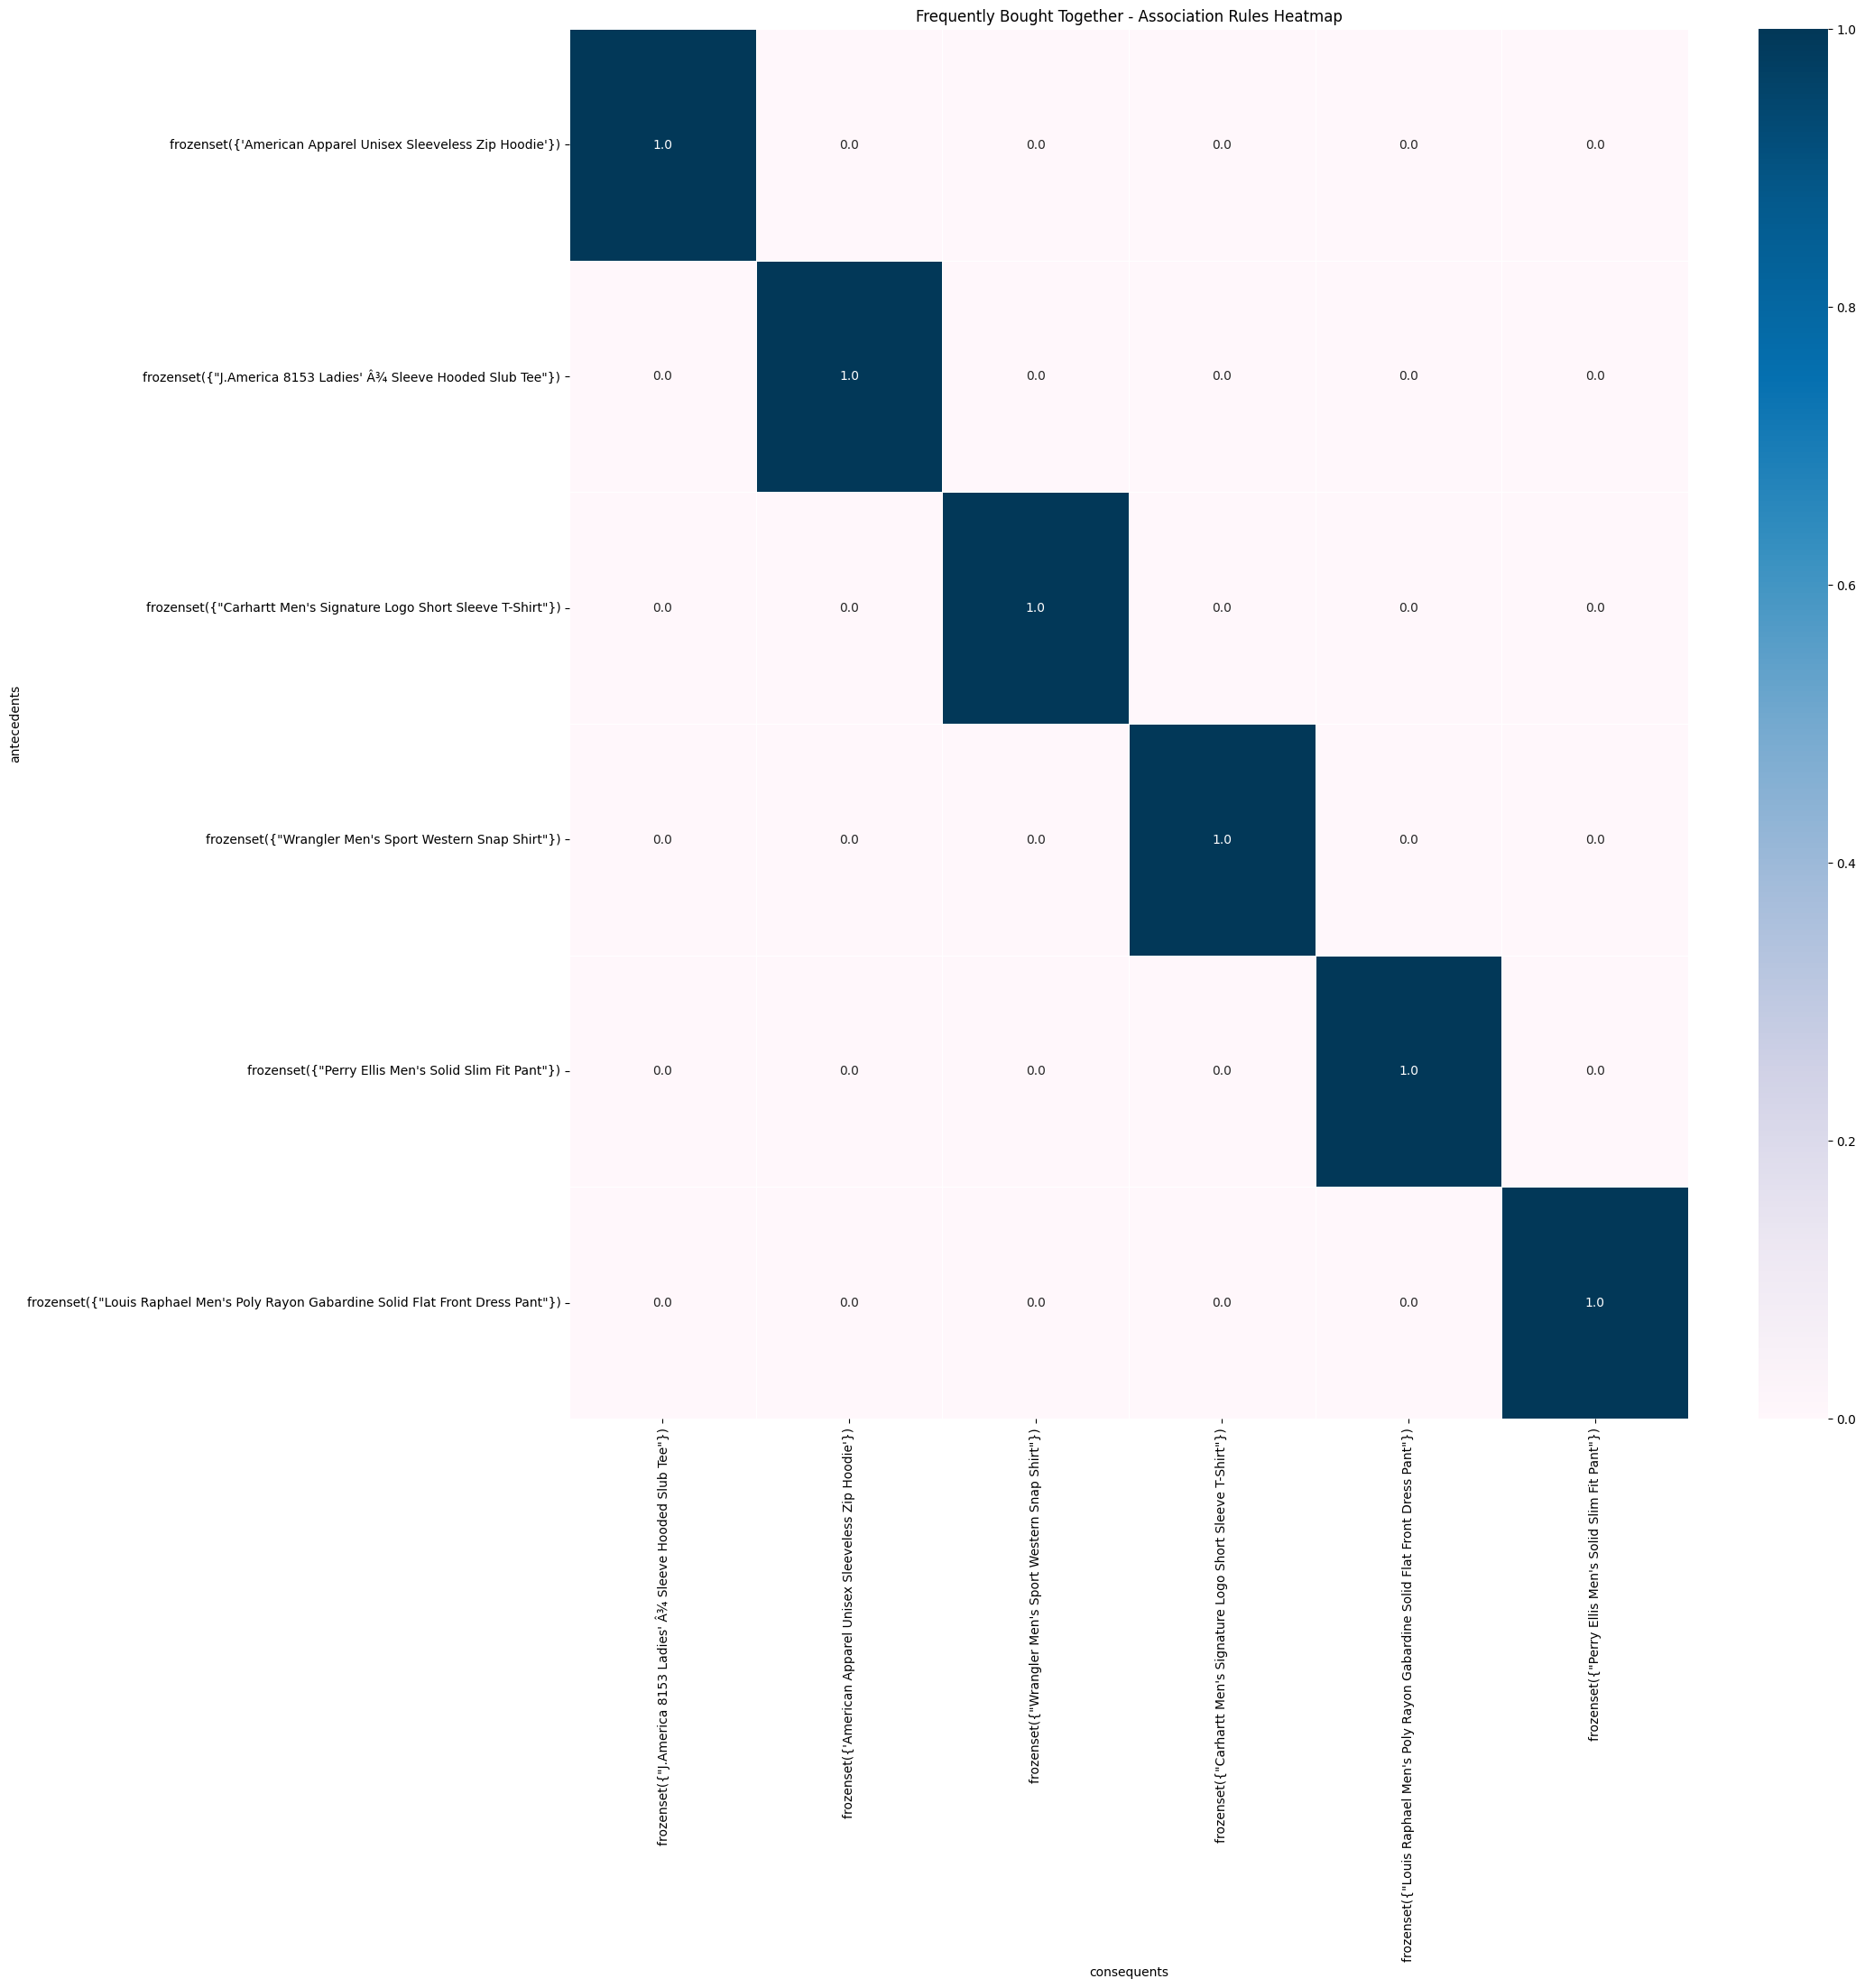

"I used Zhang's metric in my visualization because it combines support, confidence, and lift into a single measure.\nA negative value suggests that the occurrence of the antecedent reduces the likelihood of the consequent.\nIt implies that despite a certain level of confidence, the occurrence of the antecedent reduces the overall support\nor likelihood of the consequent,leading to a negative impact or anti-association.\nIn practical terms, a negative Zhang's metric might suggest scenarios where \nthe presence of one item in a transaction makes the occurrence of another item less likely than expected."

In [10]:
# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5) # Add vmin=0 to set the minimum value for the colormap
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

"""I used Zhang's metric in my visualization because it combines support, confidence, and lift into a single measure.
A negative value suggests that the occurrence of the antecedent reduces the likelihood of the consequent.
It implies that despite a certain level of confidence, the occurrence of the antecedent reduces the overall support
or likelihood of the consequent,leading to a negative impact or anti-association.
In practical terms, a negative Zhang's metric might suggest scenarios where
the presence of one item in a transaction makes the occurrence of another item less likely than expected."""

In [11]:
# Taking pairs with positive Zhang's metric in a separate dataframe

pos_pair = rules[rules['zhangs_metric'] > 0]

pos_pair.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(American Apparel Unisex Sleeveless Zip Hoodie),(J.America 8153 Ladies' Â¾ Sleeve Hooded Slub ...,0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0
1,(J.America 8153 Ladies' Â¾ Sleeve Hooded Slub ...,(American Apparel Unisex Sleeveless Zip Hoodie),0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0
2,(Carhartt Men's Signature Logo Short Sleeve T-...,(Wrangler Men's Sport Western Snap Shirt),0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0
3,(Wrangler Men's Sport Western Snap Shirt),(Carhartt Men's Signature Logo Short Sleeve T-...,0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0
4,(Perry Ellis Men's Solid Slim Fit Pant),(Louis Raphael Men's Poly Rayon Gabardine Soli...,0.000828,0.000828,0.000828,1.0,1208.0,0.000827,inf,1.0


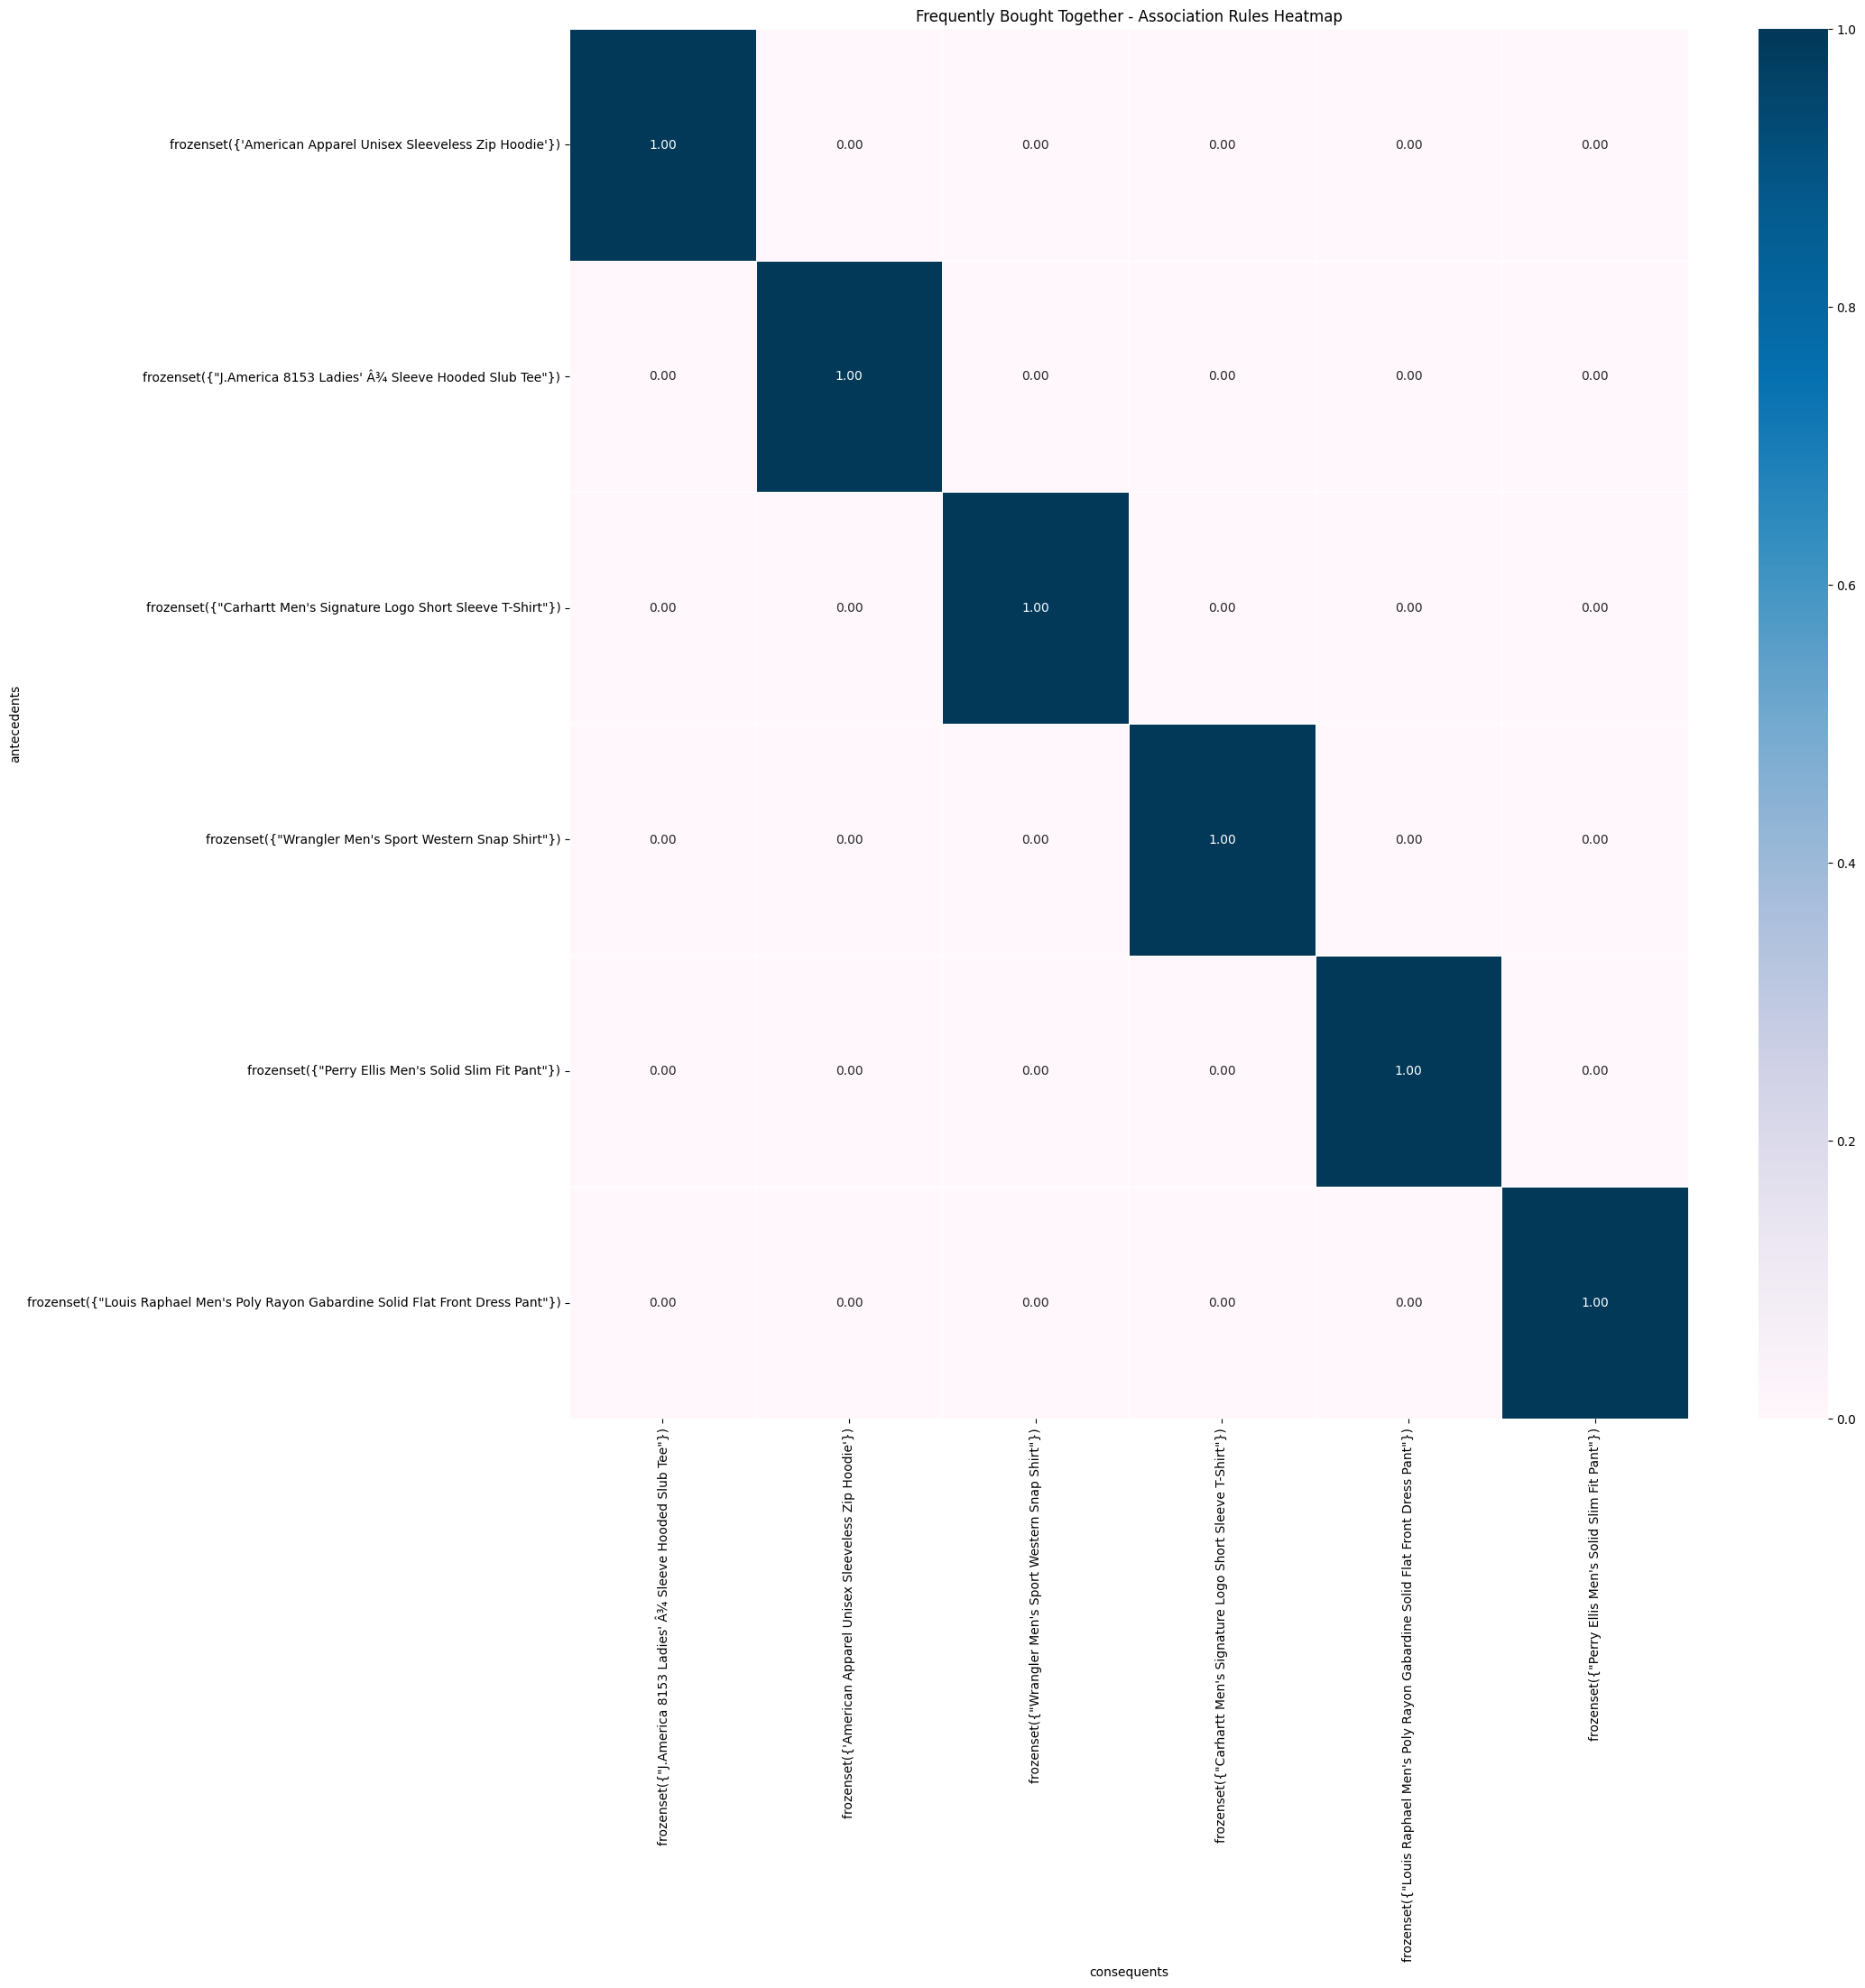

In [12]:
# Creating a matrix of product associations
pos_association = pos_pair.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(pos_association, annot=True, cmap="PuBu", fmt=".2f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

##**Recommendation**##


Here are some recommendations and insights for the e-commerce company:

High Confidence and Lift Values: The association rules in the provided dataframe have confidence and lift values of 1.0 and 896.0, respectively. This indicates very strong associations between the antecedents and consequents. Such high values suggest that when customers purchase the antecedent items, they are highly likely to purchase the consequent items as well, and the likelihood of purchasing the consequent items is significantly higher compared to what would be expected by chance.

Implications for Marketing Strategies: These strong associations can be leveraged in marketing strategies such as cross-selling and upselling. The company can strategically place or promote the consequent items alongside the antecedent items to increase the likelihood of customers purchasing both.

Diverse Product Categories: The association rules cover a wide range of product categories, from clothing items like jeans and hoodies to accessories like sunglasses and board shorts. This diversity indicates that customers are making varied purchases across different product categories, providing opportunities for the company to offer bundled deals or personalized recommendations.

Potential Product Combinations: The association rules highlight specific product combinations that are frequently purchased together. For example, items like "American Apparel Unisex Sleeveless Zip Hoodie" and "J.America 8153 Ladies' ¾ Sleeve Hooded Slub" have a strong association. Identifying such product combinations can help the company create curated product bundles or recommend complementary products to customers during their shopping journey.